<a href="https://colab.research.google.com/github/nikitaanand12/nikanand/blob/main/CT_33_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class MyLinearRegression:
    def __init__(self, weight=9, bias=3, learning_rate=0.05,
                 iterations=300):
        self.weight = weight   #value putting with diff samples
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    def predict(self, x):
        predicted_set = []   #prediction
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0   #error finding by root mean squared error
        for i in range(count):
            total_error += (y[i] - (self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0    #partial derivatives used to update i.e., gradient 
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [ ]:
import pandas as pd  #libraries and its alias
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8,7.9,8.2,8.5], 
        'Scores':[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86,89,90,93]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


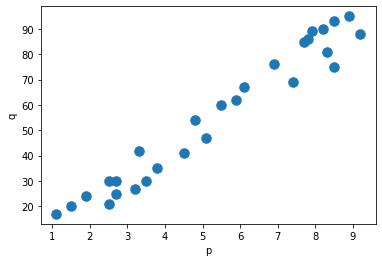

In [ ]:
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8,7.9,8.2,8.5] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86,89,90,93]
plt.scatter(x,y,s=90)
plt.xlabel('p')
plt.ylabel('q')
plt.show()

In [ ]:
#from my_linear_regression import MyLinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

X = studentscores.iloc[:, : -1].values  #shows (allrows,1st col)
y = studentscores.iloc[:, -1].values    #(:,:-1) or (:,0)...There is alpha(lab) and beta(real world) testing
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8],
        [7.9],
        [8.2],
        [8.5]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86, 89, 90, 93]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/19, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)


Iteration: 0	 Weight: [12.48326923]	 Bias: [3.51115385]	 Cost: 141.27309482493888
Iteration: 1	 Weight: [2.84774375]	 Bias: [2.05673395]	 Cost: 980.674092534424
Iteration: 2	 Weight: [29.52406017]	 Bias: [6.04358909]	 Cost: 7411.713374835135
Iteration: 3	 Weight: [-44.30847653]	 Bias: [-5.0299552]	 Cost: 56682.83094586066
Iteration: 4	 Weight: [160.06067051]	 Bias: [25.58335299]	 Cost: 434171.2300951543
Iteration: 5	 Weight: [-405.61393971]	 Bias: [-59.18909698]	 Cost: 3326281.1775812116
Iteration: 6	 Weight: [1160.14098217]	 Bias: [175.4191665]	 Cost: 25484048.013928942
Iteration: 7	 Weight: [-3173.75861421]	 Bias: [-473.99638996]	 Cost: 195244755.5825321
Iteration: 8	 Weight: [8822.19090961]	 Bias: [1323.50750277]	 Cost: 1495858578.542912
Iteration: 9	 Weight: [-24381.7900953]	 Bias: [-3651.89740513]	 Cost: 11460451332.053406
Iteration: 10	 Weight: [67524.61412783]	 Bias: [10119.65696852]	 Cost: 87803718634.30249
Iteration: 11	 Weight: [-186866.1622906]	 Bias: [-27999.11780089]	 Cost

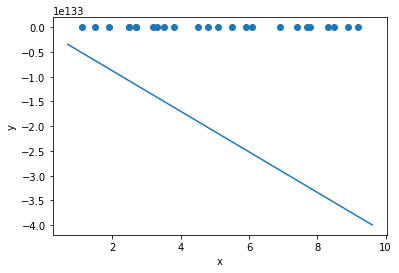

In [ ]:
w = regressor.weight
b = regressor.bias
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = b + w * x_vals
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.show()